# Raw data to Clean data 

### With  jupyter Notebook + pandas

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
emp = pd.read_excel(r'D:\1. Professionall\Data Science\07-24-2023\Rawdata.xlsx')

emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [3]:
print(emp.size)

print(emp.shape)

print(len(emp))

36
(6, 6)
6


In [4]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 416.0+ bytes


In [5]:
emp.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [6]:
emp.isnull()

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [7]:
emp.isnull().sum()

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

# Missing value treatement

## cleaning Categorical attributes

In [8]:
emp['Name']

0      Mike
1    Teddy^
2     Uma#r
3      Jane
4    Uttam*
5       Kim
Name: Name, dtype: object

In [9]:
emp['Name'] = emp['Name'].str.replace(r'\W','') # Removes any non-word character 
                                                # (any character that is not a letter, number or underscore) 
                                                
                                                # W - removes special characters not numbers
                                                # w - removes alphabets and numbers

In [10]:
emp['Name']        # This process we can clean all categorical attributes 

0     Mike
1    Teddy
2     Umar
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object

In [11]:
emp['Domain'] = emp['Domain'].str.replace(r'\W','')

emp['Location'] = emp['Location'].str.replace(r'\W','')

In [12]:
emp[['Domain', 'Location']]

,Domain,Location
0,Datascience,Mumbai
1,Testing,Bangalore
2,Dataanalyst,NaN
3,Analytics,Hyderbad
4,Statistics,NaN
5,NLP,Delhi


In [13]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34 years,Mumbai,5^00#0,2+
1,Teddy,Testing,45' yr,Bangalore,10%%000,<3
2,Umar,Dataanalyst,NaN,NaN,1$5%000,4> yrs
3,Jane,Analytics,NaN,Hyderbad,2000^0,NaN
4,Uttam,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


## cleaning Numerical attributes

**In this we have to first remove**

* Special characters
* Alphabets

In [14]:
emp['Age']

0    34 years
1      45' yr
2         NaN
3         NaN
4       67-yr
5        55yr
Name: Age, dtype: object

In [15]:
emp['Age'] = emp['Age'].str.extract('(\d+)')   # Extracts binary characters any non-digit characters will be discarded

In [16]:
emp['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [17]:
emp['Salary'] = emp['Salary'].str.replace(r'\W','')

emp['Age'] = emp['Age'].str.extract('(\d+)')

emp['Exp'] = emp['Exp'].str.extract('(\d+)')

In [18]:
emp[['Age', 'Salary', 'Exp']]

,Age,Salary,Exp
0,34,5000,2
1,45,10000,3
2,NaN,15000,4
3,NaN,20000,NaN
4,67,30000,5
5,55,60000,10


In [19]:
emp   # Process of cleaning the data is done 

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


## Fill the missing attributes

* If numerical values are missing - mean,median & mode strategy     

* if categorical data missing - mode strategy or knn strategy

In [20]:
emp.isnull().sum()   # So Age, Location and Exp attributes has missing values 

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [21]:
import numpy as np

In [22]:
emp['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [23]:
emp['Age'] = emp['Age'].fillna(np.mean(pd.to_numeric(emp['Age'])))      # to fill numerical values with mean strategy

In [24]:
emp['Age']

0       34
1       45
2    50.25
3    50.25
4       67
5       55
Name: Age, dtype: object

In [25]:
emp['Location']

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

In [26]:
emp['Location'] = emp['Location'].fillna(emp['Location'].mode()[0])     # to fill categorical values with mode strategy

In [27]:
emp['Location']

0       Mumbai
1    Bangalore
2    Bangalore
3     Hyderbad
4    Bangalore
5        Delhi
Name: Location, dtype: object

In [28]:
emp['Exp']

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

In [29]:
emp['Exp'] = emp['Exp'].fillna(np.mean(pd.to_numeric(emp['Exp'])))

In [30]:
emp['Exp']

0      2
1      3
2      4
3    4.8
4      5
5     10
Name: Exp, dtype: object

In [31]:
emp             # Cleaning data and fill mussing values is done 

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,Bangalore,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


## Chainging Data types of attributes

In [32]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      object
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: object(6)
memory usage: 416.0+ bytes


In [33]:
emp['Name'] = emp['Name'].astype('category')    # chainging Name data type (Object ---> category)

In [34]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      object  
 2   Age       6 non-null      object  
 3   Location  6 non-null      object  
 4   Salary    6 non-null      object  
 5   Exp       6 non-null      object  
dtypes: category(1), object(5)
memory usage: 594.0+ bytes


In [35]:
emp['Domain'] = emp['Domain'].astype('category')

emp['Location'] = emp['Location'].astype('category') 

In [36]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      object  
 3   Location  6 non-null      category
 4   Salary    6 non-null      object  
 5   Exp       6 non-null      object  
dtypes: category(3), object(3)
memory usage: 934.0+ bytes


In [37]:
emp['Age'] = emp['Age'].astype(int)    # chainging Name data type (Object ---> int)

In [38]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int32   
 3   Location  6 non-null      category
 4   Salary    6 non-null      object  
 5   Exp       6 non-null      object  
dtypes: category(3), int32(1), object(2)
memory usage: 910.0+ bytes


In [39]:
emp['Salary'] = emp['Salary'].astype(int) 

emp['Exp'] = emp['Exp'].astype(int) 

In [40]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int32   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int32   
 5   Exp       6 non-null      int32   
dtypes: category(3), int32(3)
memory usage: 862.0 bytes


##  Exporting the DataFrame to file format

In [41]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [42]:
emp.to_csv('clean_data.csv')    # to export dataframe to a .csv file

                                # you can export dataframe into your desired format

In [43]:
import os                    # Location of current directory
os.getcwd()

'C:\\Users\\sathv\\KPS Tutorial'

## Let's apply EDA Techniques

In [44]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns   # advanced visualization

In [45]:
emp['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: int32

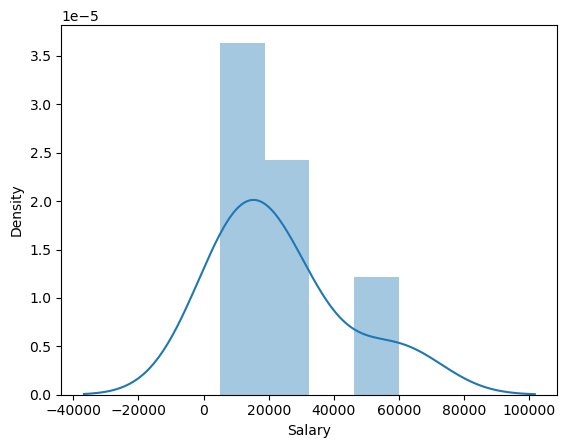

In [46]:
vis1 = sns.distplot(emp['Salary'])

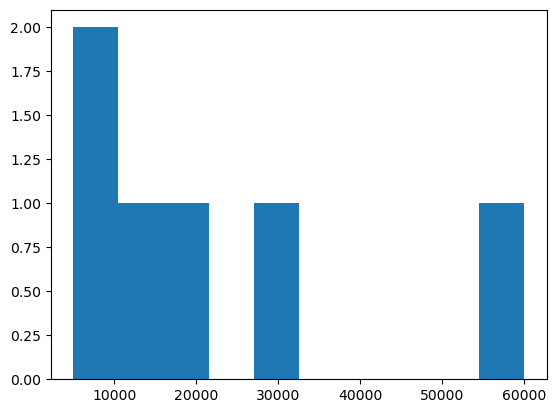

In [47]:
vis2 = plt.hist(emp['Salary'])

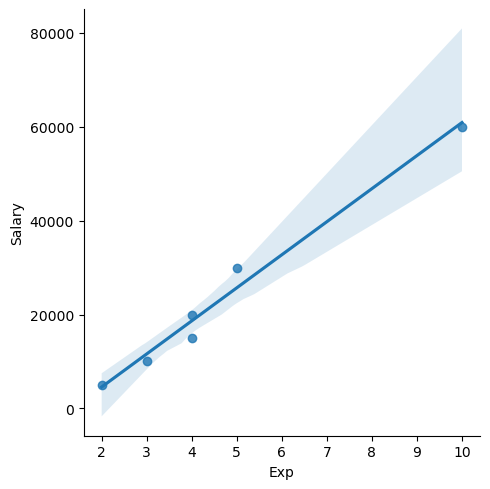

In [48]:
vis3 = sns.lmplot(data=emp,x = 'Exp', y='Salary')

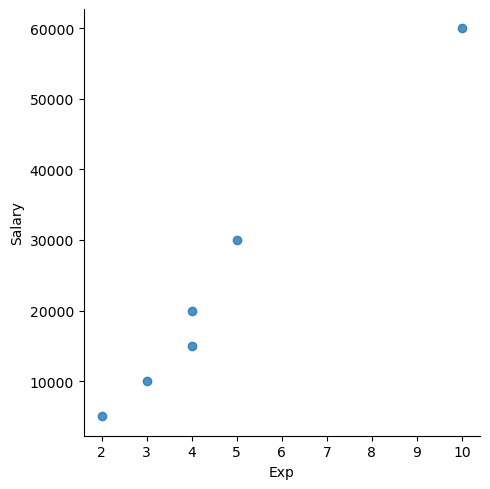

In [49]:
vis4 = sns.lmplot(data=emp,x = 'Exp', y='Salary', fit_reg = False)

## IMPUTATION TECHNIQUE

In [50]:
imputation = pd.get_dummies(emp) # returns a new DataFrame with dummy variables for each category present 
                                 # in the original columns
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,55,60000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [51]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


## Spliting Functions

In [52]:
emp[:]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [53]:
emp[1:3]

,Name,Domain,Age,Location,Salary,Exp
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4


In [54]:
emp[::2]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
2,Umar,Dataanalyst,50,Bangalore,15000,4
4,Uttam,Statistics,67,Bangalore,30000,5


In [55]:
emp[::-1]

,Name,Domain,Age,Location,Salary,Exp
5,Kim,NLP,55,Delhi,60000,10
4,Uttam,Statistics,67,Bangalore,30000,5
3,Jane,Analytics,50,Hyderbad,20000,4
2,Umar,Dataanalyst,50,Bangalore,15000,4
1,Teddy,Testing,45,Bangalore,10000,3
0,Mike,Datascience,34,Mumbai,5000,2


In [56]:
x_iv = emp[['Name', 'Domain', 'Age', 'Location', 'Exp']]

y_dv = emp[['Salary']]

In [57]:
x_iv

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [58]:
y_dv

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


In [59]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10
